# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os

# Importing Dataset
Here, Just importing the monthly data from the getfamaFrenchFactors as this project focuses on checking the investment returns, through monthly investment with strategic seasonal investment.

In [3]:
ff3_monthly = gff.famaFrench3Factor(frequency='m')

Since, wanted to project the investment growth for the period of Jan 2010 to Dec 2019, filtering out that period from the whole dataset.

In [5]:
ff3_monthly = ff3_monthly[(ff3_monthly['date_ff_factors'] >= '2010-01') & (ff3_monthly['date_ff_factors'] < '2020-01')].reset_index(drop = True)

In [6]:
ff3_monthly.head()

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,2010-01-31,-0.0336,0.0040,0.0043,0.0000
1,2010-02-28,0.0340,0.0119,0.0323,0.0000
2,2010-03-31,0.0631,0.0148,0.0221,0.0001
3,2010-04-30,0.0200,0.0487,0.0289,0.0001
4,2010-05-31,-0.0789,0.0009,-0.0244,0.0001


To begin with we wanted to invest round the year once every month $1000. Hence, adding a column to our dataset that reflects the same. 

In [7]:
# Adding a column which shows $1000 investment monthly
ff3_monthly['Investment_Amt'] = 1000

# Adding a column to show cummilation sum of investment
ff3_monthly['Monthly_Amt_Aggregate'] = ff3_monthly['Investment_Amt'].cumsum()

# Intially setting monthly return 0 for all months
ff3_monthly['Monthly_Return'] = 0

## Calculating Monthly return
For simplicity just considering Mkt-RF and RF to calculate monthly return for investment of $1000 each month. Not considering other factors such as SMB, HML 

In [8]:
for i in range(len(ff3_monthly)):
    if i == 0:
        ff3_monthly.loc[i, 'Monthly_Return'] = ff3_monthly.loc[i, 'Investment_Amt']*(1 + ff3_monthly.iloc[i,1] + ff3_monthly.iloc[i,4])
    else:
        ff3_monthly.loc[i, 'Monthly_Return'] = (ff3_monthly.loc[i, 'Investment_Amt']+ff3_monthly.loc[i-1, 'Monthly_Return'])*(1 + ff3_monthly.iloc[i,1] + ff3_monthly.iloc[i,4])

In [9]:
ff3_monthly

,date_ff_factors,Mkt-RF,SMB,HML,RF,Investment_Amt,Monthly_Amt_Aggregate,Monthly_Return
0,2010-01-31,-0.0336,0.0040,0.0043,0.0000,1000,1000,966.400000
1,2010-02-28,0.0340,0.0119,0.0323,0.0000,1000,2000,2033.257600
2,2010-03-31,0.0631,0.0148,0.0221,0.0001,1000,3000,3224.959480
3,2010-04-30,0.0200,0.0487,0.0289,0.0001,1000,4000,4309.881166
4,2010-05-31,-0.0789,0.0009,-0.0244,0.0001,1000,5000,4891.462530
...,...,...,...,...,...,...,...,...
115,2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,1000,116000,216303.266167
116,2019-09-30,0.0143,-0.0096,0.0675,0.0018,1000,117000,220801.848752
117,2019-10-31,0.0206,0.0029,-0.0191,0.0016,1000,118000,226725.849795
118,2019-11-30,0.0387,0.0077,-0.0202,0.0012,1000,119000,236812.111201


# Visualization of the monthly return over the time period

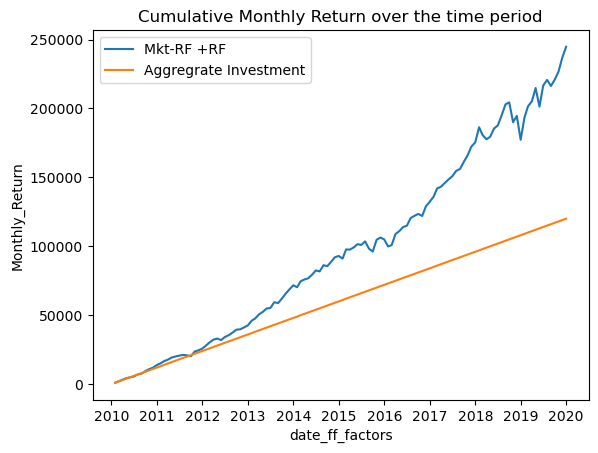

In [12]:
sns.lineplot(data=ff3_monthly, x = 'date_ff_factors', y = 'Monthly_Return', label = 'Mkt-RF +RF')
sns.lineplot(data=ff3_monthly, x = 'date_ff_factors', y = 'Monthly_Amt_Aggregate', label = 'Aggregrate Investment' )
plt.title("Cumulative Monthly Return over the time period")
plt.legend()

## Investment return if not invested for summer months
Investing $\$1333.33$ every month except for summer months i.e. June, July and August. The total investment of an entire year will be same as investing $\$1000$ for 12 months 

In [18]:
summer_months = [6,7,8]
for i in range(len(ff3_monthly)):
    if ff3_monthly.loc[i, 'date_ff_factors'].month in summer_months:
        ff3_monthly.loc[i,'No_Summer_Investment'] = 0
    else:
        ff3_monthly.loc[i,'No_Summer_Investment'] = 1333.33

In [19]:
ff3_monthly.head(5)

,date_ff_factors,Mkt-RF,SMB,HML,RF,Investment_Amt,Monthly_Amt_Aggregate,Monthly_Return,No_Summer_Investment,Monthly_Aggregate
0,2010-01-31,-0.0336,0.0040,0.0043,0.0000,1000,1000,966.400000,1333.33,1333.33
1,2010-02-28,0.0340,0.0119,0.0323,0.0000,1000,2000,2033.257600,1333.33,2666.66
2,2010-03-31,0.0631,0.0148,0.0221,0.0001,1000,3000,3224.959480,1333.33,3999.99
3,2010-04-30,0.0200,0.0487,0.0289,0.0001,1000,4000,4309.881166,1333.33,5333.32
4,2010-05-31,-0.0789,0.0009,-0.0244,0.0001,1000,5000,4891.462530,1333.33,6666.65


In [20]:
# Adding a column to show cummilation sum of investment when no investment in summer
ff3_monthly['Monthly_Aggregate'] = ff3_monthly['No_Summer_Investment'].cumsum()

In [21]:
ff3_monthly.head(5)

,date_ff_factors,Mkt-RF,SMB,HML,RF,Investment_Amt,Monthly_Amt_Aggregate,Monthly_Return,No_Summer_Investment,Monthly_Aggregate
0,2010-01-31,-0.0336,0.0040,0.0043,0.0000,1000,1000,966.400000,1333.33,1333.33
1,2010-02-28,0.0340,0.0119,0.0323,0.0000,1000,2000,2033.257600,1333.33,2666.66
2,2010-03-31,0.0631,0.0148,0.0221,0.0001,1000,3000,3224.959480,1333.33,3999.99
3,2010-04-30,0.0200,0.0487,0.0289,0.0001,1000,4000,4309.881166,1333.33,5333.32
4,2010-05-31,-0.0789,0.0009,-0.0244,0.0001,1000,5000,4891.462530,1333.33,6666.65


# Visualization of the monthly return over the time period 

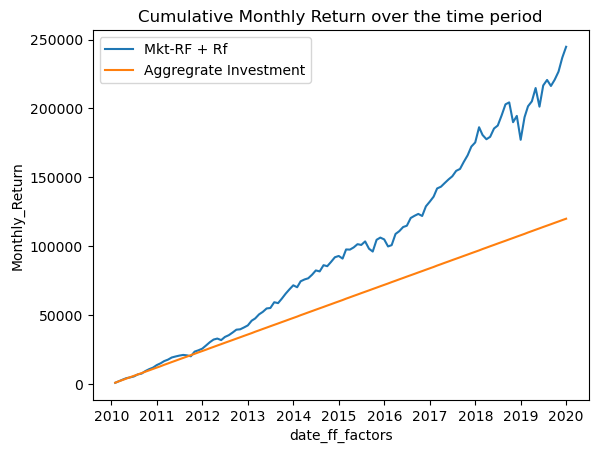

In [23]:
sns.lineplot(data=ff3_monthly, x = 'date_ff_factors', y = 'Monthly_Return', label = 'Mkt-RF + Rf')
sns.lineplot(data=ff3_monthly, x = 'date_ff_factors', y = 'Monthly_Amt_Aggregate', label = 'Aggregrate Investment')
plt.title("Cumulative Monthly Return over the time period")
plt.legend()